In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy as ccEnLo
from tensorflow.keras.metrics import CategoricalCrossentropy as ccEnMe

from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train.shape, y_train.shape # ((60000, 28, 28), (60000,))
# X_test.shape, y_test.shape # ((10000, 28, 28), (10000,))

In [3]:
X_train = X_train.reshape(60000, -1)
y_train = to_categorical(y_train)

X_test = X_test.reshape(10000, -1)
y_test = to_categorical(y_test)

# X_train.shape, y_train.shape ## ((60000, 784), (60000, 10))
# X_test.shape, y_test.shape ## ((10000, 784), (10000, 10))
# X_train[0].shape (784,)

In [4]:
model = Sequential([
    Dense(units = 64, input_shape = (784,), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(
    optimizer = Adam(learning_rate = 0.01),
    loss = ccEnLo(),
    metrics = [ccEnMe()], 
)

In [6]:
history = model.fit(
    X_train, y_train,
    epochs = 66,
    validation_split = 0.2,
    use_multiprocessing = True,
    verbose = 1
)

Epoch 1/66
1500/1500 [==============================] - 11s 7ms/step - loss: 5.9007 - categorical_crossentropy: 5.9007 - val_loss: 0.8304 - val_categorical_crossentropy: 0.8304
Epoch 2/66
1500/1500 [==============================] - 11s 7ms/step - loss: 0.7173 - categorical_crossentropy: 0.7173 - val_loss: 0.5853 - val_categorical_crossentropy: 0.5853
Epoch 3/66
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6242 - categorical_crossentropy: 0.6242 - val_loss: 0.6338 - val_categorical_crossentropy: 0.6338
Epoch 4/66
1500/1500 [==============================] - 13s 8ms/step - loss: 0.6433 - categorical_crossentropy: 0.6433 - val_loss: 0.6675 - val_categorical_crossentropy: 0.6675
Epoch 5/66
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6863 - categorical_crossentropy: 0.6863 - val_loss: 0.6711 - val_categorical_crossentropy: 0.6711
Epoch 6/66
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7081 - categorical_crossentropy: 0.7

In [7]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 1.7464 - categorical_crossentropy: 1.7464


[1.746416449546814, 1.746416449546814]

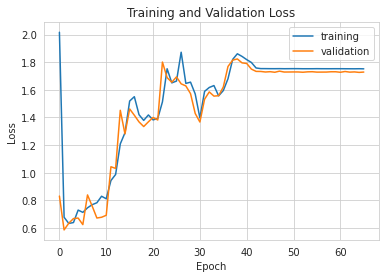

In [12]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

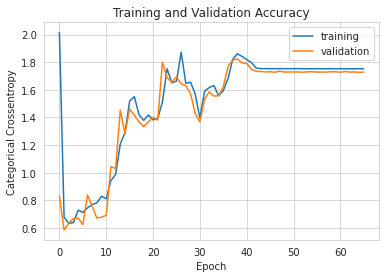

In [13]:
plt.plot(history.history['categorical_crossentropy'], label='training')
plt.plot(history.history['val_categorical_crossentropy'], label='validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.show()

In [14]:
test_set_score = model.evaluate(X_test, y_test, verbose=1)
print("Test set loss:", test_set_score[0])
print("Test set categorical cross entropy:", test_set_score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.7649 - categorical_crossentropy: 1.7649
Test set loss: 1.764926552772522
Test set categorical cross entropy: 1.764926552772522
